In [1]:
# Imports
import pykep as pk
from pykep.orbit_plots import plot_planet, plot_lambert
from pykep import AU, DAY2SEC
import pygmo as pg


# Plotting Imports
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [27]:
# Define departure and arrival times
t1 = pk.epoch_from_string('2006-Jan-19 00:00:00')           # Departure epoch 
t2 = pk.epoch_from_string('2007-Feb-28 00:00:00')        # Arrival epoch (MJD2000 + 720 days)
dt = (t2.mjd2000 - t1.mjd2000) * DAY2SEC  # Time of flight in seconds

# Load planetary ephemerides
earth = pk.planet.jpl_lp('earth')
jupiter = pk.planet.jpl_lp('jupiter')

# Get position and velocity vectors at departure and arrival
rE, vE = earth.eph(t1)
rJ, vJ = jupiter.eph(t2)

# Solve Lambert problem
l = pk.lambert_problem(r1=rE, r2=rJ, tof=dt, mu=pk.MU_SUN)

# getting delta v

v_departure = l.get_v1()[0] # velocity of spacecraft at earth departure
delta_v_departure = (np.linalg.norm(np.array(v_departure) - np.array(vE)))/1000 # km/s  # substracting velocities and taking magnitude 
C3 = delta_v_departure**2

print(f" C3 for New Horizons: {C3 :.1f} km²/s²") 

 C3 for New Horizons: 158.8 km²/s²


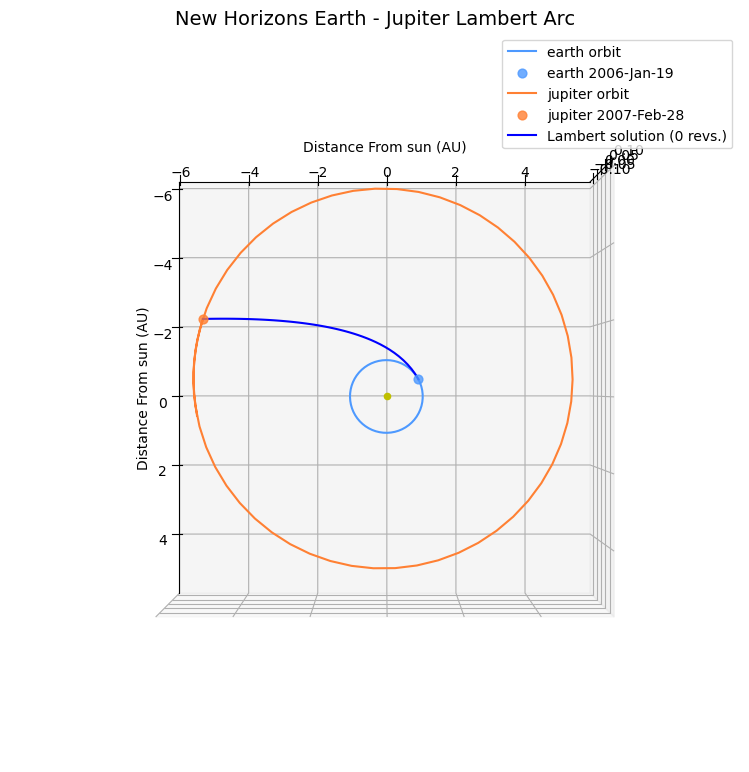

In [28]:
# Plotting setup
fig = plt.figure(figsize=(32, 10))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
#ax2 = fig.add_subplot(1, 3, 2, projection='3d')
#ax3 = fig.add_subplot(1, 3, 3, projection='3d')

# Center of the solar system (Sun)
for ax in [ax1]:
    ax.scatter([0], [0], [0], color='y')  # Sun
    plot_planet(earth, t0 = t1, color=(0.3, 0.6, 1), legend=True, units=AU, axes=ax)
    plot_planet(jupiter, t0 =t2, tf= pk.epoch_from_string('2019-12-31 00:00:00'), color=(1, 0.5, 0.2), legend=True, units=AU, axes=ax)
    plot_lambert(l, sol=0, color='b', legend=True, units=AU, axes=ax)
    ax1.set_title("New Horizons Earth - Jupiter Lambert Arc", fontsize=14)
    ax1.set_xlabel("Distance From sun (AU)")
    ax1.set_ylabel("Distance From sun (AU)")
    ax1.set_box_aspect([1,1,1])


ax1.view_init(90, 0)   # Top-down view
#ax3.view_init(0, 0)    # Side view
plt.show()